# DS 3000 - Assignment 4

**Student Name**: Shreyas Shukla

**Date**: 24 Sep 2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 0: 

 (0 pts) Load the data directly from the url into a dataframe. Here is the link to the data: https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xOLinks to an external site.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt


url = 'https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO'
df = pd.read_csv(url)
print(df.head())

   Year County of Program Location Program Category  \
0  2007                     Albany           Crisis   
1  2007                     Albany           Crisis   
2  2007                     Albany           Crisis   
3  2007                     Albany           Crisis   
4  2007                     Albany           Crisis   

                     Service Type      Age Group Primary Substance Group  \
0  Medical Managed Detoxification       Under 18                  Heroin   
1  Medical Managed Detoxification  18 through 24              All Others   
2  Medical Managed Detoxification  18 through 24           Other Opioids   
3  Medical Managed Detoxification  18 through 24                  Heroin   
4  Medical Managed Detoxification  18 through 24                 Alcohol   

   Admissions  
0           4  
1           2  
2           6  
3         132  
4          35  


## Question 1: 
(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 


In [13]:
# Check the data types of the columns
print(df.info())

# Convert columns to suitable data types if needed
# In this case, all columns seem to be in appropriate data types

# Handle missing values
# For example, we can fill missing values in 'Primary Substance Group' with a placeholder
df['Primary Substance Group'] = df['Primary Substance Group'].fillna('Unknown')

# Remove duplicate rows
df.drop_duplicates(inplace=True)


# Verify the changes
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 

## Question 2: 

Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.

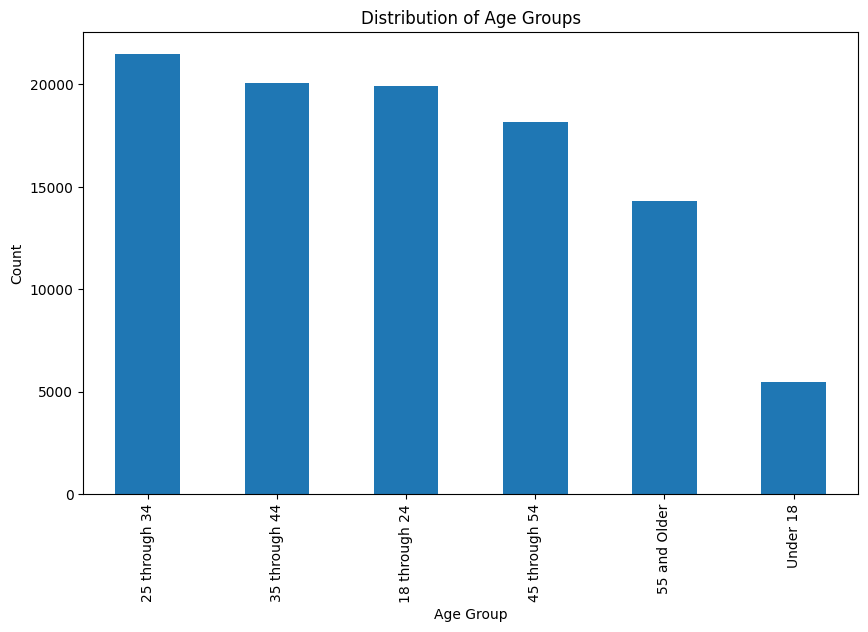

In [14]:
# Distribution of Age Groups
plt.figure(figsize=(10, 6))
df['Age Group'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Distribution of Age Groups:
The bar chart showing the distribution of age groups highlights which age ranges are more prevalent among individuals in the dataset. From the chart, we can infer which demographics are more frequently involved in the types of services offered, indicating where the focus of resources or interventions might be necessary.

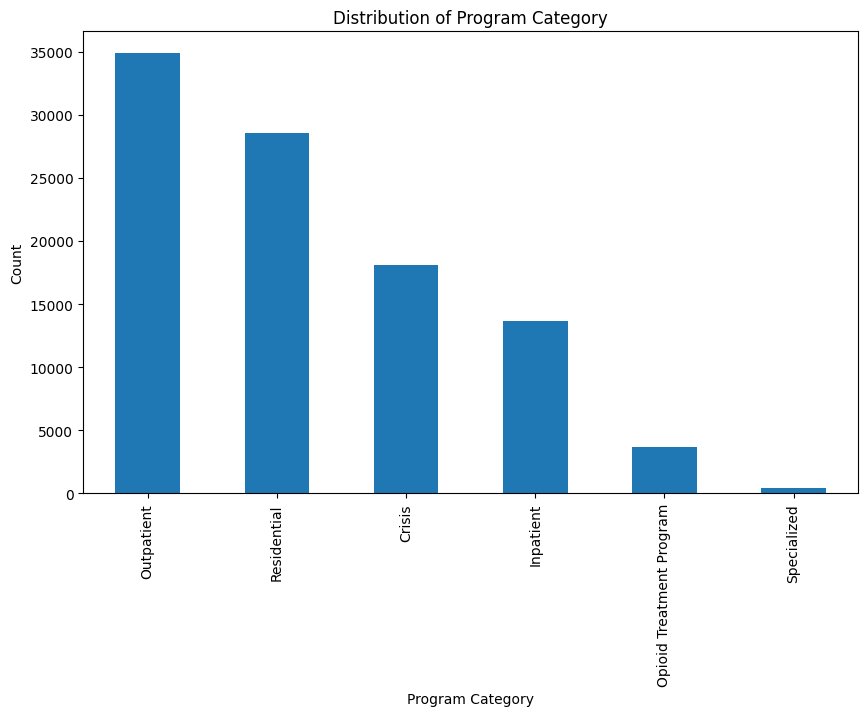

In [15]:
# Distribution of Program Category
plt.figure(figsize=(10, 6))
df['Program Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Program Category')
plt.xlabel('Program Category')
plt.ylabel('Count')
plt.show()

This bar chart displays how different types of programs are categorized, and it helps us understand the variety of services provided. It can show which program types (e.g., rehabilitation, crisis intervention) are more common, reflecting the needs of the population served.

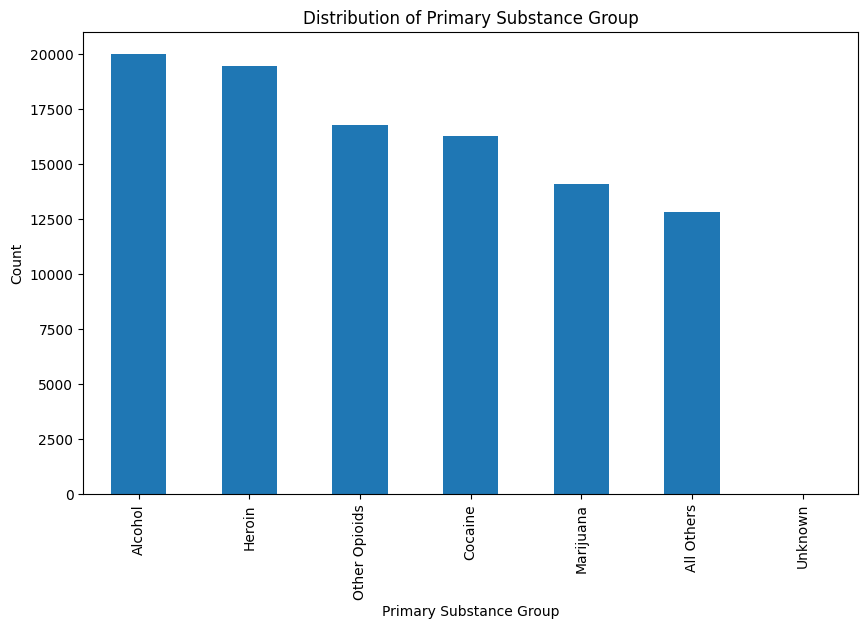

In [16]:

# Distribution of Primary Substance Group
plt.figure(figsize=(10, 6))
df['Primary Substance Group'].value_counts().plot(kind='bar')
plt.title('Distribution of Primary Substance Group')
plt.xlabel('Primary Substance Group')
plt.ylabel('Count')
plt.show()


The bar chart illustrates the frequency of different primary substance groups. By identifying the most common substances involved in admissions, this chart can provide insight into the prevalent substance abuse issues faced by the population, which can inform targeted public health strategies.

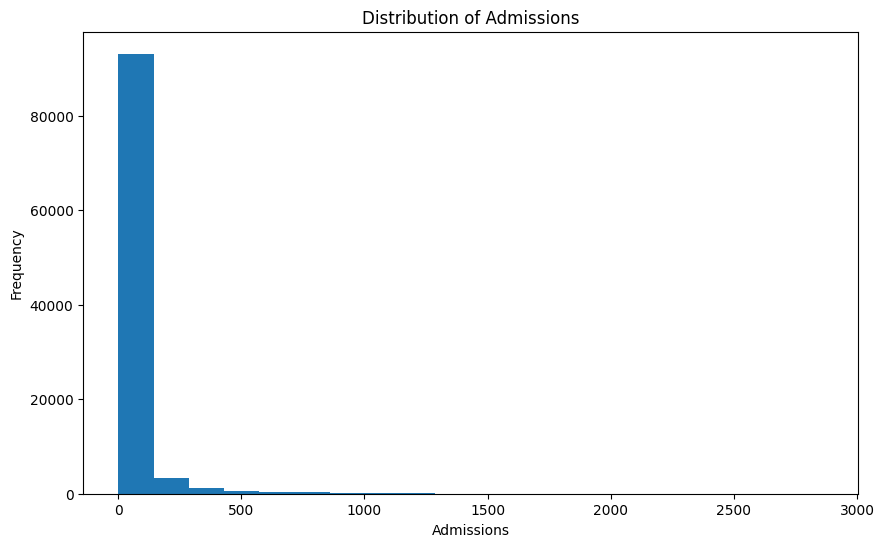

In [17]:

# Distribution of Admissions
plt.figure(figsize=(10, 6))
df['Admissions'].plot(kind='hist', bins=20)
plt.title('Distribution of Admissions')
plt.xlabel('Admissions')
plt.ylabel('Frequency')
plt.show()

The histogram for admissions provides an overview of the frequency distribution of admission numbers across the dataset. This chart helps to visualize the spread of admissions, showing whether most programs have a large or small number of admissions, and if there are outliers or a significant variance.


## Question 4: 

5 pts) Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.
Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.

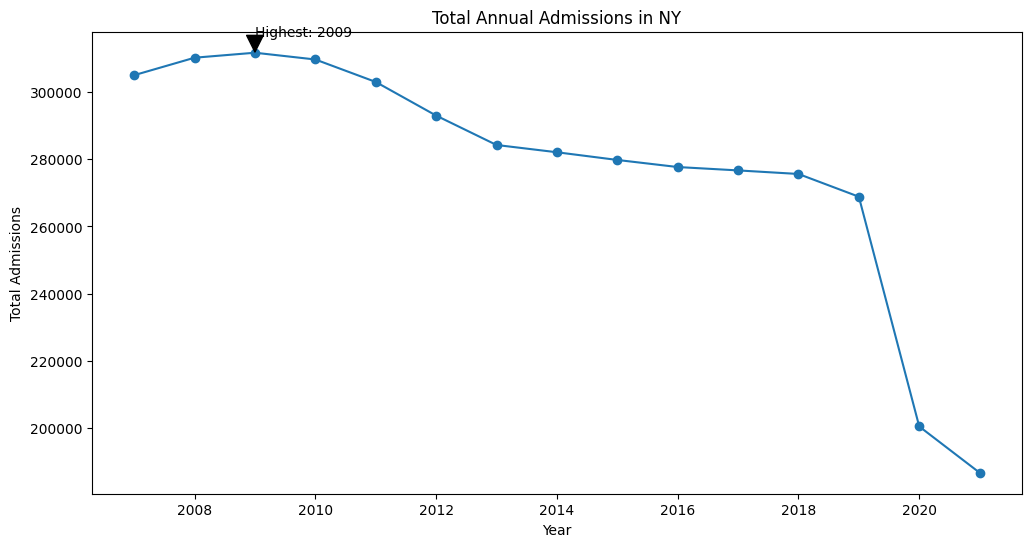

In [35]:
def annualAdmissions():
    # Calculate the total number of admissions per year
    annual_admissions = df.groupby('Year')['Admissions'].sum()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    annual_admissions.plot(kind='line', marker='o')
    plt.title('Total Annual Admissions in NY')
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    
    # Annotate the year with the highest number of admissions
    max_year = annual_admissions.idxmax()
    max_value = annual_admissions.max()
    plt.annotate(f'Highest: {max_year}', xy=(max_year, max_value), xytext=(max_year, max_value + 5000),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.show()

# Execute the function
annualAdmissions()

The line chart visualizing annual admissions trends over time helps to identify patterns or changes in admissions rates. The annotation on the highest year indicates when admissions peaked, which could be linked to specific public health events, policy changes, or other external factors.

# Question 5: 

Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. What are the patterns that you have observed?
Note: Ensure that you visualize the results.

In [29]:
def annualAdmissionsByCounty(year):
    # Filter the data for the given year
    df_year = df[df['Year'] == year]
    
    # Calculate the proportion of admissions grouped by county
    county_admissions = df_year.groupby('County of Program Location')['Admissions'].sum()
    total_admissions = county_admissions.sum()
    county_proportions = (county_admissions / total_admissions) * 100
    
    # Get the top 10 counties
    top_10_counties = county_proportions.nlargest(10)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    top_10_counties.plot(kind='bar')
    plt.title(f'Proportion of Admissions by County in {year}')
    plt.xlabel('County')
    plt.ylabel('Proportion of Admissions (%)')
    plt.show()
    

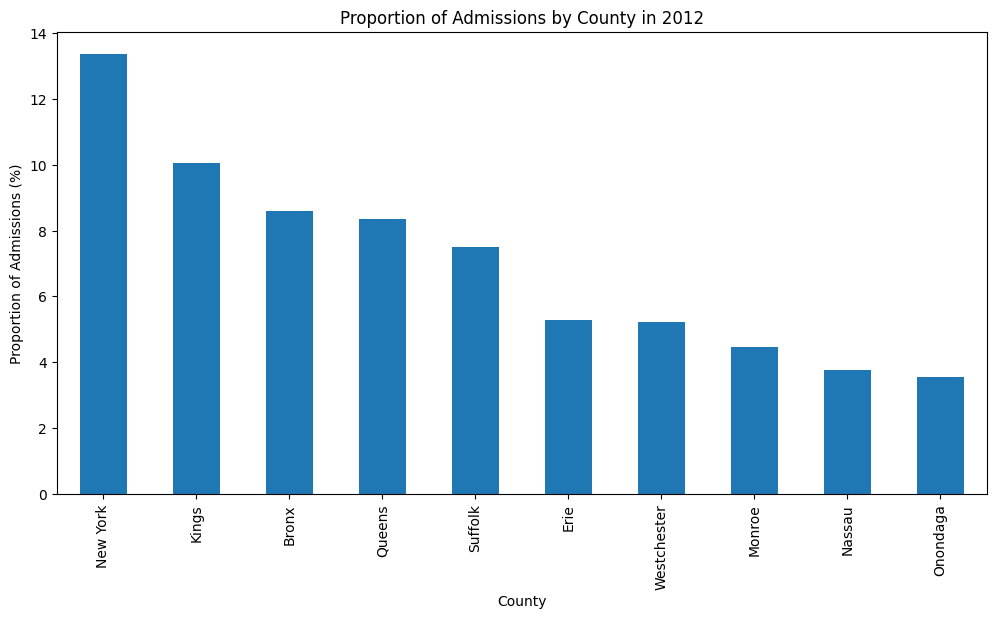

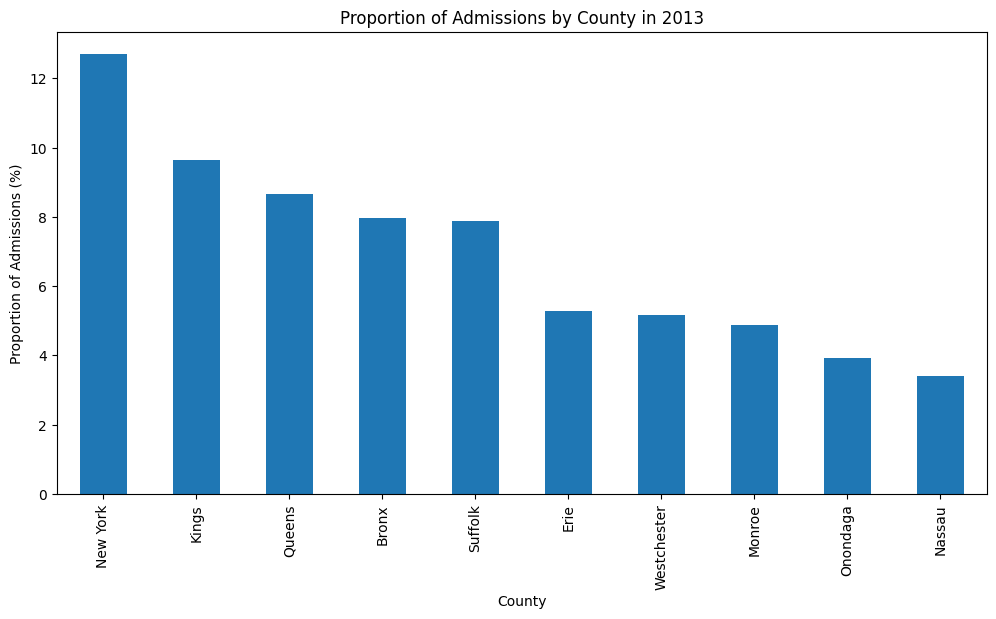

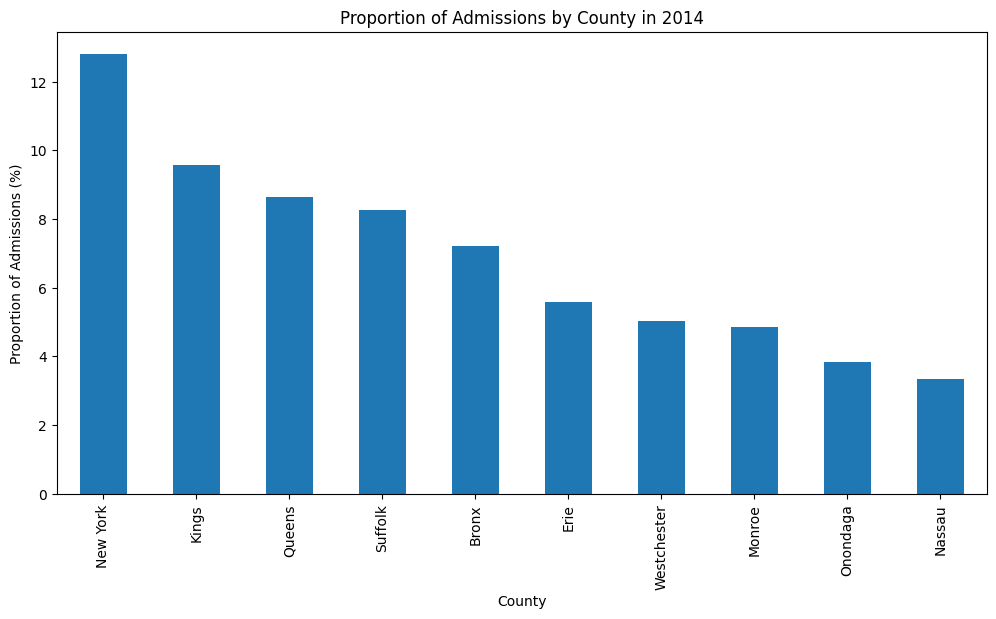

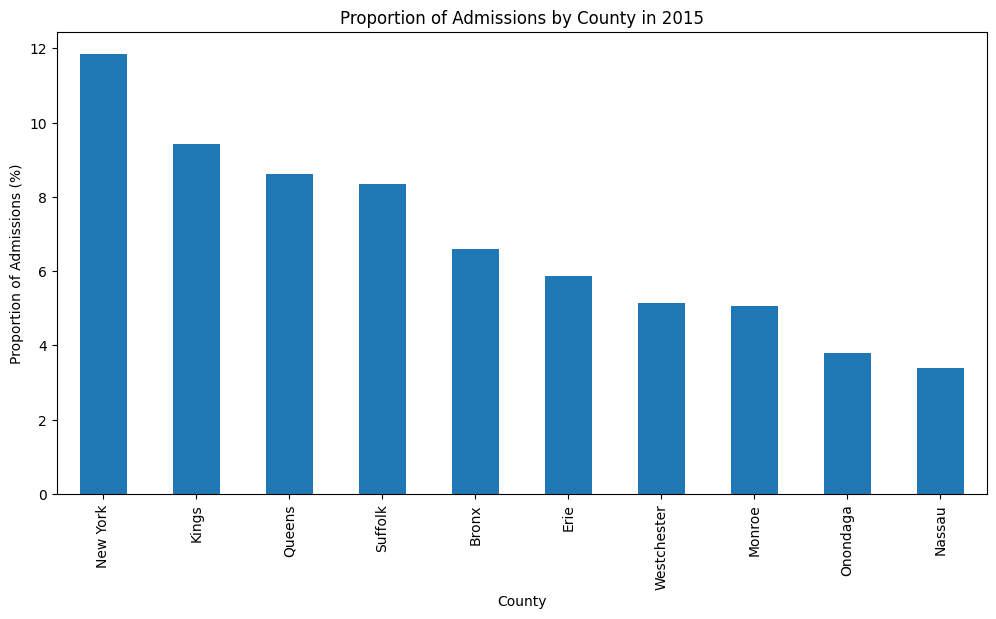

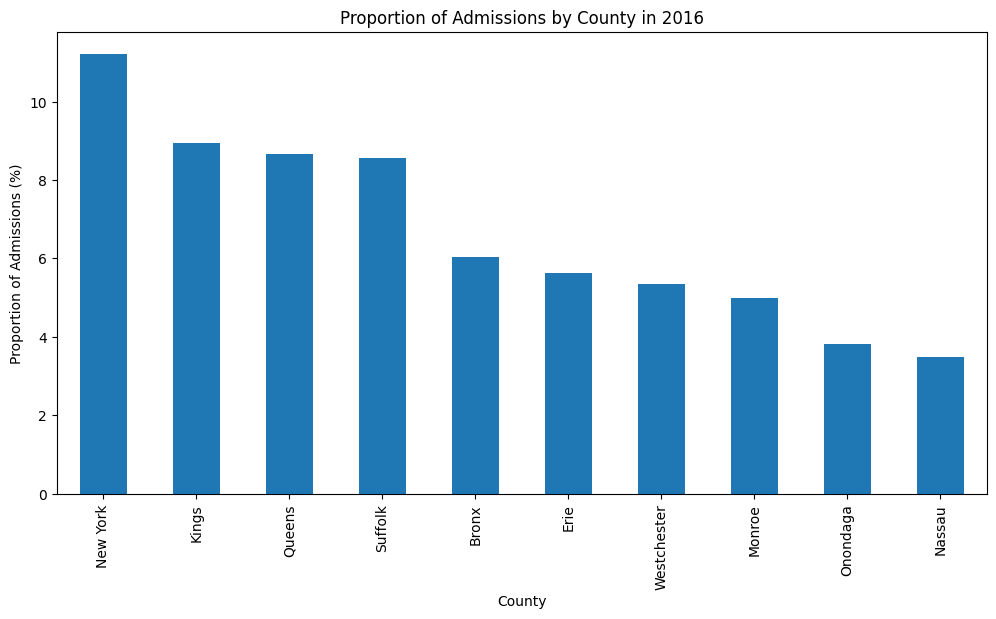

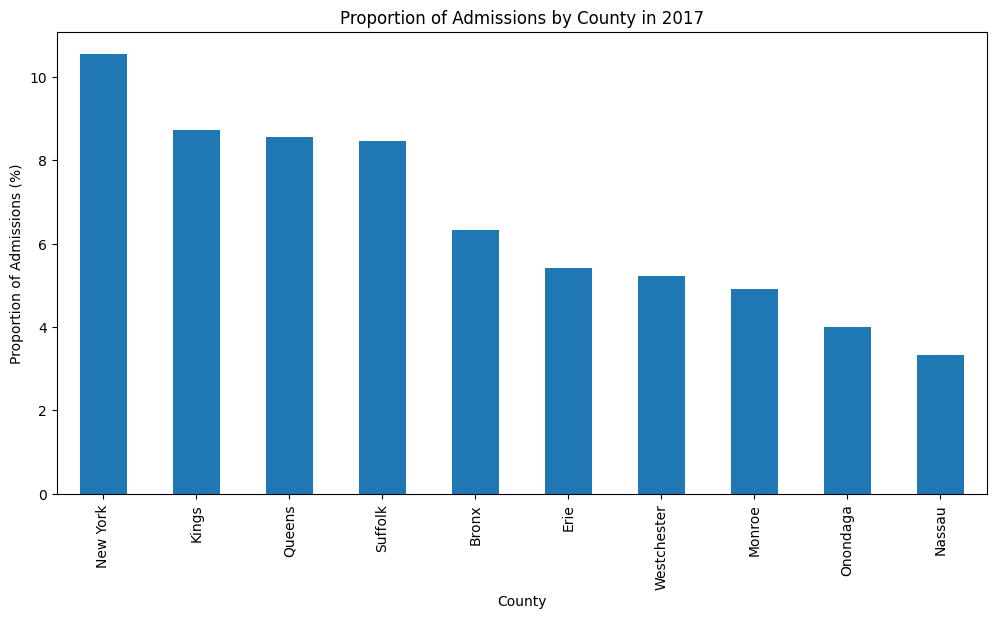

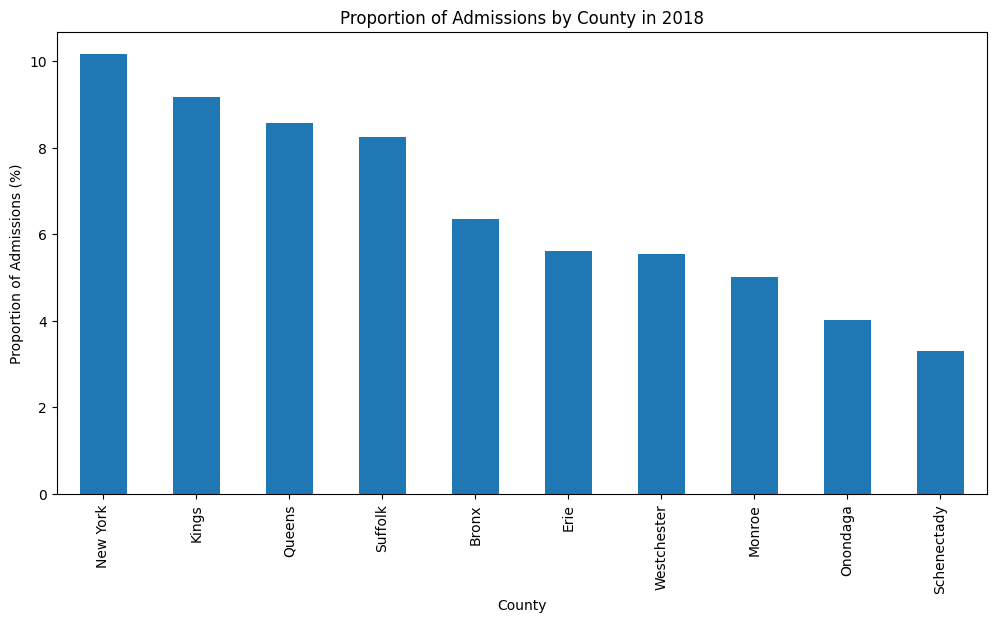

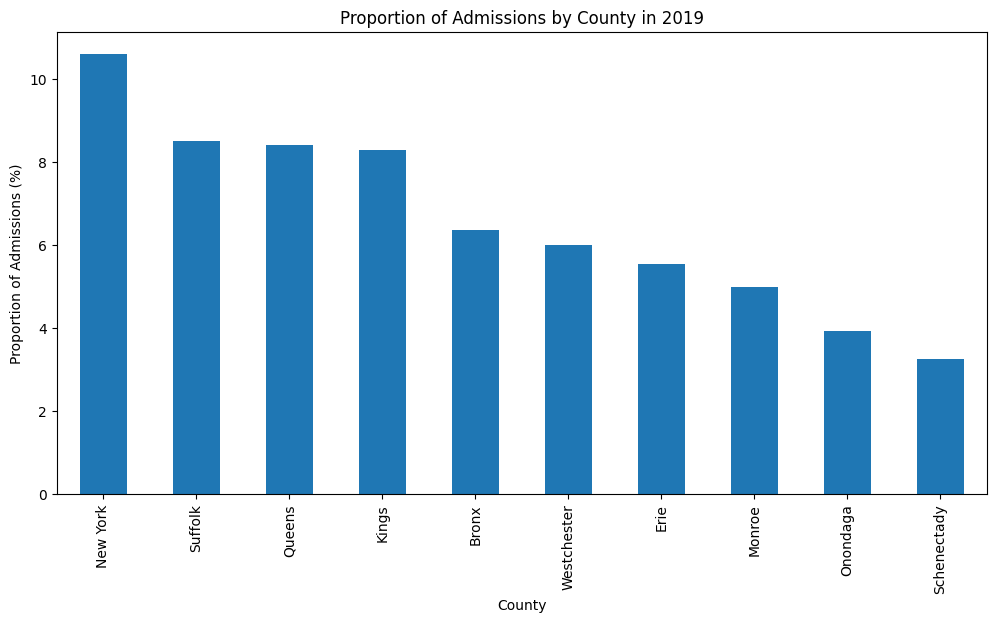

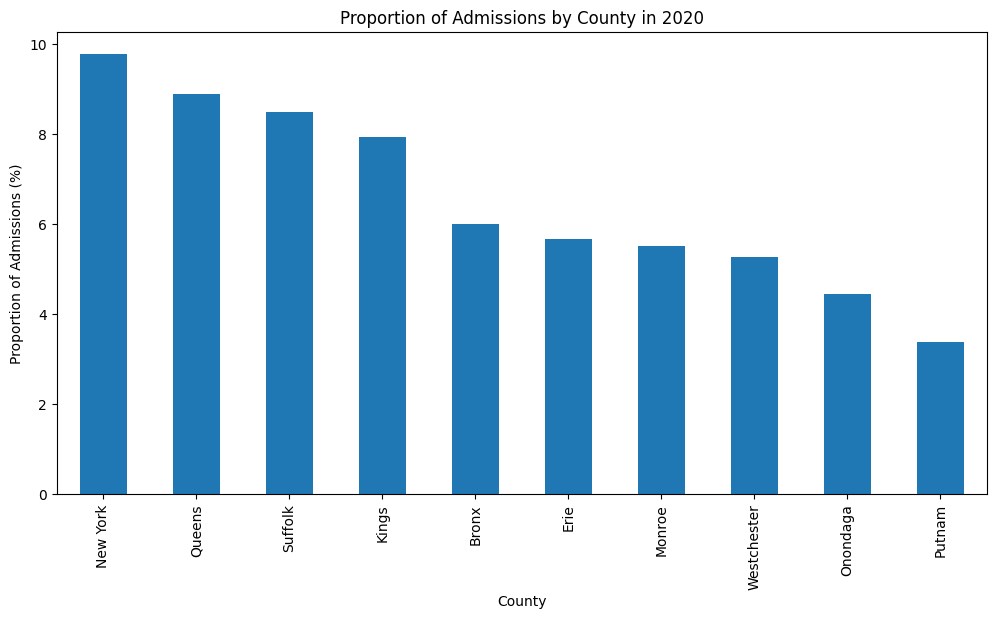

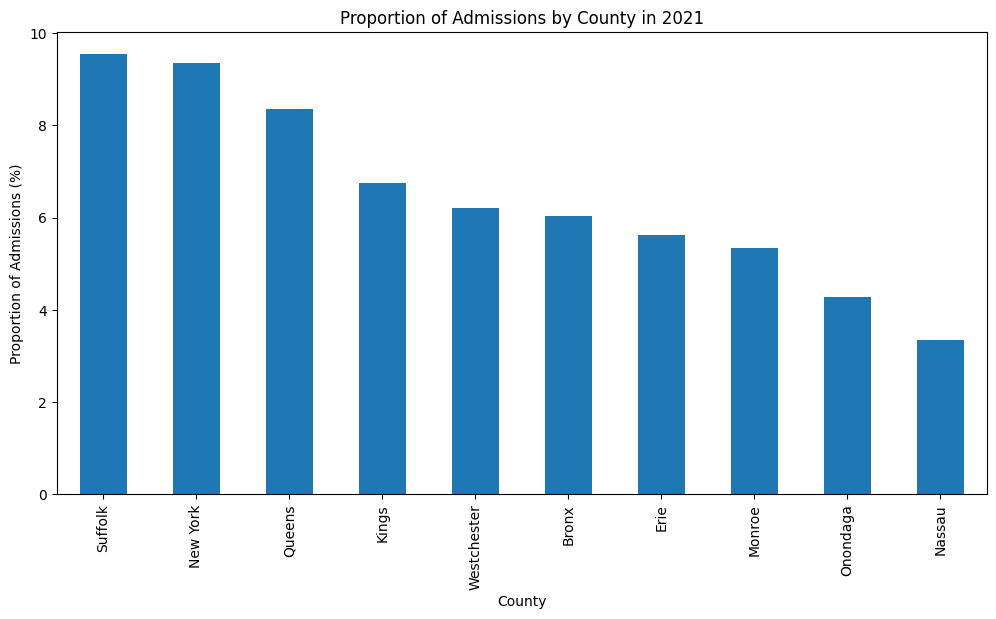

In [30]:

for year in range(2012, 2022):
    annualAdmissionsByCounty(year)

The bar charts for each year show the proportion of admissions per county. Over the last 10 years, it might reveal consistent patterns, such as certain counties consistently contributing a large percentage of total admissions, which could highlight areas with ongoing substance abuse challenges or higher service demand.

# Question 6
(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

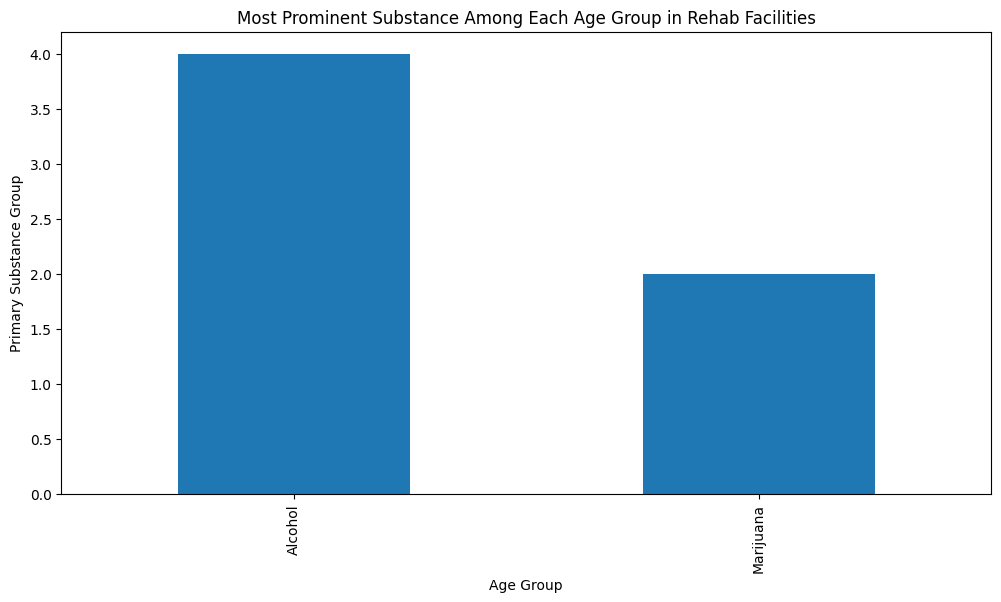

Age Group
18 through 24    Marijuana
25 through 34      Alcohol
35 through 44      Alcohol
45 through 54      Alcohol
55 and Older       Alcohol
Under 18         Marijuana
Name: Primary Substance Group, dtype: category
Categories (2, object): ['Alcohol', 'Marijuana']


In [32]:
# Filter the data for admissions to "Rehab" facilities
rehab_keywords = ['rehab', 'rehabilitation']
rehab_df = df[df['Service Type'].str.contains('|'.join(rehab_keywords), case=False, na=False)]

# Identify the most prominent substance among each age group
prominent_substance_by_age = rehab_df.groupby('Age Group')['Primary Substance Group'].agg(lambda x: x.value_counts().idxmax())

# Convert to categorical type with ordered categories
prominent_substance_by_age = prominent_substance_by_age.astype('category')

# Visualize the results
plt.figure(figsize=(12, 6))
prominent_substance_by_age.value_counts().plot(kind='bar')
plt.title('Most Prominent Substance Among Each Age Group in Rehab Facilities')
plt.xlabel('Age Group')
plt.ylabel('Primary Substance Group')
plt.show()

# Display the results
print(prominent_substance_by_age)

This visualization categorizes the most frequent primary substances in rehab facilities by age group. Alcohol is the dominant substance among older age groups, while marijuana is more prevalent in younger age groups, indicating differing substance abuse trends across generations.


# Question 7
(10 pts) Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

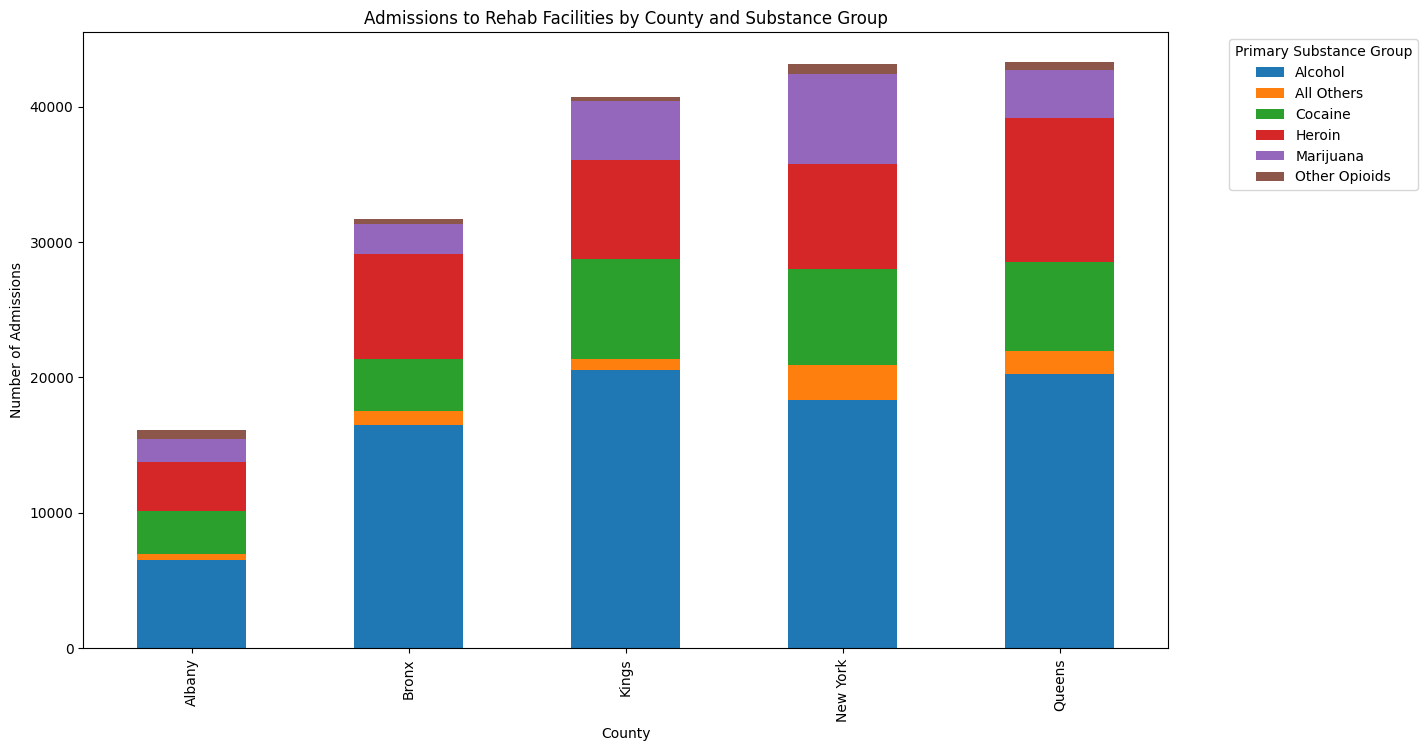

Primary Substance Group     Alcohol  All Others  Cocaine  Heroin  Marijuana  \
County of Program Location                                                    
Albany                         6547         435     3140    3656       1652   
Bronx                         16472        1060     3864    7733       2236   
Kings                         20533         866     7352    7311       4347   
New York                      18365        2590     7085    7702       6700   
Queens                        20262        1657     6606   10649       3514   

Primary Substance Group     Other Opioids  
County of Program Location                 
Albany                                726  
Bronx                                 306  
Kings                                 303  
New York                              676  
Queens                                647  


In [33]:
# Select 5 counties for analysis
selected_counties = ['Albany', 'Bronx', 'Kings', 'New York', 'Queens']

# Filter the rehab data for the selected counties
filtered_rehab_df = rehab_df[rehab_df['County of Program Location'].isin(selected_counties)]

# Group by County and Primary Substance Group, then sum the Admissions
county_substance_admissions = filtered_rehab_df.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions'].sum().unstack()

# Plot the results
county_substance_admissions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Admissions to Rehab Facilities by County and Substance Group')
plt.xlabel('County')
plt.ylabel('Number of Admissions')
plt.legend(title='Primary Substance Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the data for further analysis
print(county_substance_admissions)

The stacked bar chart comparing different substances and counties shows how substance abuse varies geographically. For example, some counties may have higher admissions for alcohol, while others have a stronger presence of opioid-related admissions, helping to identify localized substance abuse trends.

# Question 8

(5 pts)[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

<Figure size 1400x800 with 0 Axes>

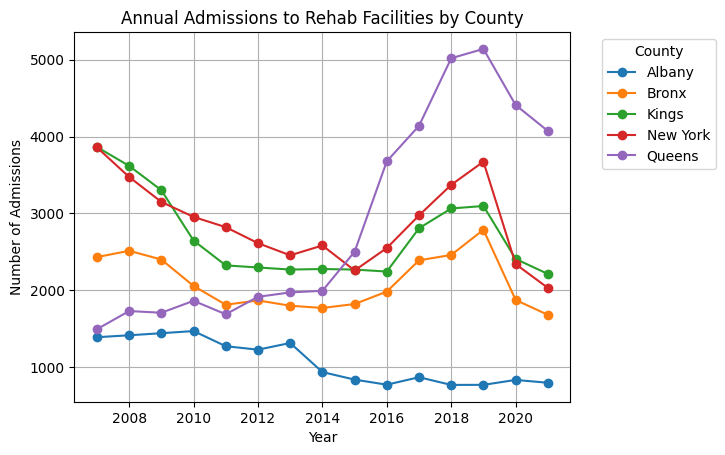

In [34]:
# Group the rehab data by Year and County, then sum the Admissions
annual_admissions_by_county = rehab_df[rehab_df['County of Program Location'].isin(selected_counties)].groupby(['Year', 'County of Program Location'])['Admissions'].sum().unstack()

# Plot the results
plt.figure(figsize=(14, 8))
annual_admissions_by_county.plot(kind='line', marker='o')
plt.title('Annual Admissions to Rehab Facilities by County')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Explain ^